In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
# Load the dataset
file_path = 'Youth_Tobacco.csv'
yts_data = pd.read_csv(file_path)



In [2]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(yts_data.head())

First few rows of the dataset:
   YEAR LocationAbbr   LocationDesc                  TopicType  \
0  2004           OH           Ohio  Tobacco Use – Survey Data   
1  2008           AL        Alabama  Tobacco Use – Survey Data   
2  2015           WV  West Virginia  Tobacco Use – Survey Data   
3  2005           IL       Illinois  Tobacco Use – Survey Data   
4  2005           CT    Connecticut  Tobacco Use – Survey Data   

                       TopicDesc     MeasureDesc DataSource  Response  \
0          Cigarette Use (Youth)  Smoking Status        YTS      Ever   
1          Cigarette Use (Youth)  Smoking Status        YTS      Ever   
2  Smokeless Tobacco Use (Youth)     User Status        YTS  Frequent   
3          Cigarette Use (Youth)  Smoking Status        YTS      Ever   
4  Smokeless Tobacco Use (Youth)     User Status        YTS      Ever   

  Data_Value_Unit Data_Value_Type  ...                    GeoLocation  \
0               %      Percentage  ...  (40.060210141, -82.4

In [3]:
#checking shape
yts_data.shape

(10600, 31)

In [4]:
# Check for missing values
missing_values = yts_data.isnull().sum()
missing_values


YEAR                              0
LocationAbbr                      0
LocationDesc                      0
TopicType                         0
TopicDesc                         0
MeasureDesc                       0
DataSource                        0
Response                       2410
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                      520
Data_Value_Footnote_Symbol    10083
Data_Value_Footnote           10083
Data_Value_Std_Err              520
Low_Confidence_Limit            517
High_Confidence_Limit           520
Sample_Size                     520
Gender                            0
Race                              0
Age                               0
Education                         0
GeoLocation                       4
TopicTypeId                       0
TopicId                           0
MeasureId                         0
StratificationID1                 0
StratificationID2                 0
StratificationID3           

In [5]:
# Columns to check for missing values
columns_to_clean = ['GeoLocation', 'Data_Value', 'Data_Value_Std_Err', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size']

# Remove rows   have missing values
yts_data = yts_data.dropna(subset=columns_to_clean)

# Verify the cleaning by checking the shape or the sum of missing values
print(yts_data.shape)
print(yts_data.isnull().sum())


(10076, 31)
YEAR                              0
LocationAbbr                      0
LocationDesc                      0
TopicType                         0
TopicDesc                         0
MeasureDesc                       0
DataSource                        0
Response                       1889
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                        0
Data_Value_Footnote_Symbol    10076
Data_Value_Footnote           10076
Data_Value_Std_Err                0
Low_Confidence_Limit              0
High_Confidence_Limit             0
Sample_Size                       0
Gender                            0
Race                              0
Age                               0
Education                         0
GeoLocation                       0
TopicTypeId                       0
TopicId                           0
MeasureId                         0
StratificationID1                 0
StratificationID2                 0
StratificationID

In [6]:
#dropping those two empty features
yts_data = yts_data.drop(columns=['Data_Value_Footnote_Symbol', 'Data_Value_Footnote'])

# Verify the columns are dropped
print(yts_data.columns)


Index(['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc',
       'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Std_Err',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'Gender', 'Race', 'Age', 'Education', 'GeoLocation', 'TopicTypeId',
       'TopicId', 'MeasureId', 'StratificationID1', 'StratificationID2',
       'StratificationID3', 'StratificationID4', 'SubMeasureID',
       'DisplayOrder'],
      dtype='object')


In [7]:
# Check for missing values
missing_values = yts_data.isnull().sum()
missing_values

YEAR                        0
LocationAbbr                0
LocationDesc                0
TopicType                   0
TopicDesc                   0
MeasureDesc                 0
DataSource                  0
Response                 1889
Data_Value_Unit             0
Data_Value_Type             0
Data_Value                  0
Data_Value_Std_Err          0
Low_Confidence_Limit        0
High_Confidence_Limit       0
Sample_Size                 0
Gender                      0
Race                        0
Age                         0
Education                   0
GeoLocation                 0
TopicTypeId                 0
TopicId                     0
MeasureId                   0
StratificationID1           0
StratificationID2           0
StratificationID3           0
StratificationID4           0
SubMeasureID                0
DisplayOrder                0
dtype: int64

In [9]:
# Check for missing values
missing_values = yts_data.isnull().sum()
missing_values

YEAR                     0
LocationAbbr             0
LocationDesc             0
TopicType                0
TopicDesc                0
MeasureDesc              0
DataSource               0
Response                 0
Data_Value_Unit          0
Data_Value_Type          0
Data_Value               0
Data_Value_Std_Err       0
Low_Confidence_Limit     0
High_Confidence_Limit    0
Sample_Size              0
Gender                   0
Race                     0
Age                      0
Education                0
GeoLocation              0
TopicTypeId              0
TopicId                  0
MeasureId                0
StratificationID1        0
StratificationID2        0
StratificationID3        0
StratificationID4        0
SubMeasureID             0
DisplayOrder             0
dtype: int64

In [8]:
#filling missing value as unkowns in response feature
yts_data['Response'].fillna('Unknown', inplace=True)


In [10]:
# Check for missing values
missing_values = yts_data.isnull().sum()
missing_values

YEAR                     0
LocationAbbr             0
LocationDesc             0
TopicType                0
TopicDesc                0
MeasureDesc              0
DataSource               0
Response                 0
Data_Value_Unit          0
Data_Value_Type          0
Data_Value               0
Data_Value_Std_Err       0
Low_Confidence_Limit     0
High_Confidence_Limit    0
Sample_Size              0
Gender                   0
Race                     0
Age                      0
Education                0
GeoLocation              0
TopicTypeId              0
TopicId                  0
MeasureId                0
StratificationID1        0
StratificationID2        0
StratificationID3        0
StratificationID4        0
SubMeasureID             0
DisplayOrder             0
dtype: int64

In [11]:
# Check for duplicate rows
duplicates = yts_data.duplicated().sum()
duplicates

0

In [13]:
# Display the structure of the dataset to understand available columns for aggregation
yts_data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 10599
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   10076 non-null  int64  
 1   LocationAbbr           10076 non-null  object 
 2   LocationDesc           10076 non-null  object 
 3   TopicType              10076 non-null  object 
 4   TopicDesc              10076 non-null  object 
 5   MeasureDesc            10076 non-null  object 
 6   DataSource             10076 non-null  object 
 7   Response               10076 non-null  object 
 8   Data_Value_Unit        10076 non-null  object 
 9   Data_Value_Type        10076 non-null  object 
 10  Data_Value             10076 non-null  float64
 11  Data_Value_Std_Err     10076 non-null  float64
 12  Low_Confidence_Limit   10076 non-null  float64
 13  High_Confidence_Limit  10076 non-null  float64
 14  Sample_Size            10076 non-null  float64
 15  Ge

## Summary statistics for numerical columns##

In [14]:
# Display a summary to understand the numeric distribution,  for the tobacco use rate (Data_Value)
yts_data.describe()

,YEAR,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
count,10076.000000,10076.000000,10076.000000,10076.000000,10076.000000,10076.000000,10076.000000
mean,2006.867705,20.319035,1.850973,16.703374,23.943132,1483.832572,8.343092
std,5.417412,21.153165,1.777582,18.559545,23.967822,2189.891960,2.945307
min,1999.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000
25%,2002.000000,3.000000,0.600000,1.700000,4.300000,671.000000,7.000000
50%,2006.000000,10.500000,1.300000,7.900000,13.200000,1001.500000,9.000000
75%,2011.000000,36.400000,2.400000,29.600000,42.325000,1642.000000,11.000000
max,2017.000000,98.000000,16.100000,97.600000,98.400000,36910.000000,12.000000


In [15]:
# Aggregate data by YEAR to get the average tobacco use rate per year
yearly_data = yts_data.groupby('YEAR')['Data_Value'].mean().reset_index()
yearly_data

,YEAR,Data_Value
0,1999,26.072849
1,2000,26.714642
2,2001,23.370000
3,2002,25.193280
4,2003,21.267216
5,2004,20.704131
6,2005,21.792195
7,2006,21.762874
8,2007,20.013158
9,2008,18.231670


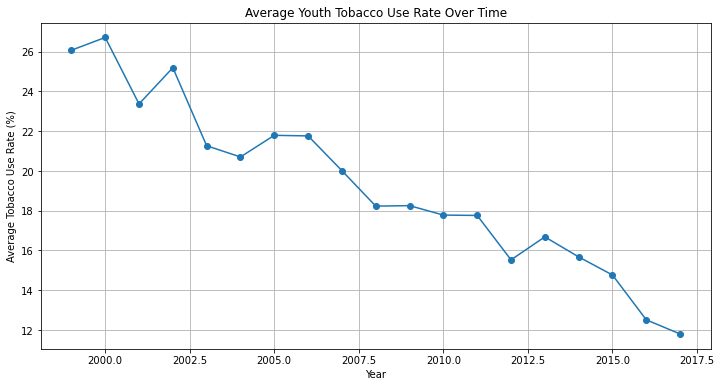

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(yearly_data['YEAR'], yearly_data['Data_Value'], marker='o', linestyle='-')
plt.title('Average Youth Tobacco Use Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Average Tobacco Use Rate (%)')
plt.grid(True)
plt.show()


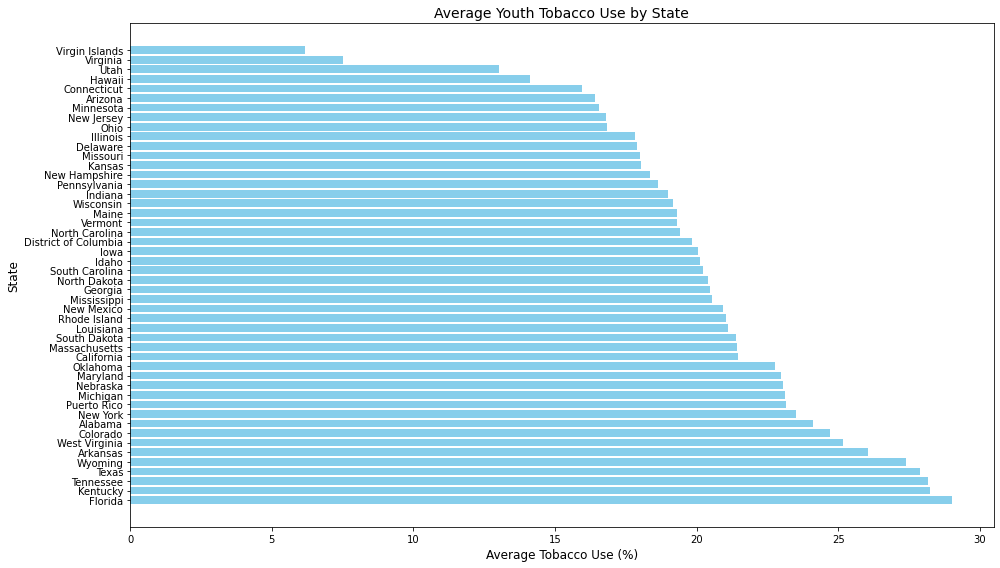

In [17]:
# Exclude the national aggregate and Guam entries for state comparison
state_comparison_data = yts_data[(yts_data['LocationDesc'] != 'National (States and DC)') & (yts_data['LocationDesc'] != 'Guam')]

# Calculate the average tobacco use by state
average_use_by_state = state_comparison_data.groupby('LocationDesc')['Data_Value'].mean().reset_index().sort_values(by='Data_Value', ascending=False)

# Plot the result
plt.figure(figsize=(14, 8))
plt.barh(average_use_by_state['LocationDesc'], average_use_by_state['Data_Value'], color='skyblue')
plt.title('Average Youth Tobacco Use by State', fontsize=14)
plt.xlabel('Average Tobacco Use (%)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()


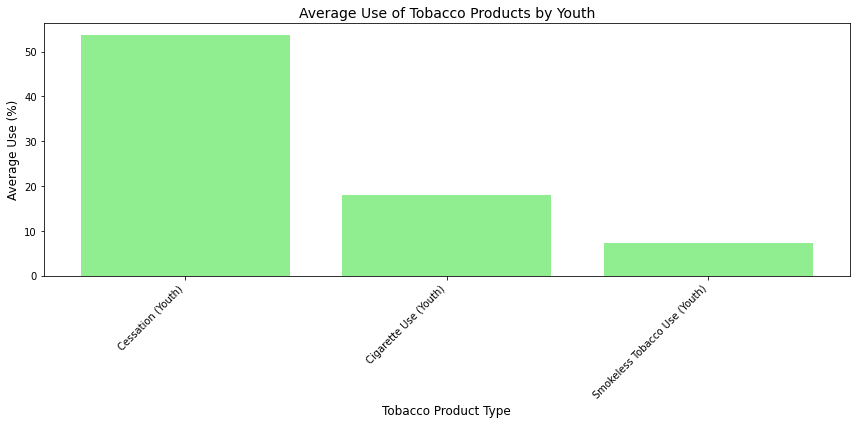

In [18]:
# Calculate the average use percentage for each type of tobacco product
average_use_by_product = yts_data.groupby('TopicDesc')['Data_Value'].mean().reset_index().sort_values(by='Data_Value', ascending=False)

# Plot the result
plt.figure(figsize=(12, 6))
plt.bar(average_use_by_product['TopicDesc'], average_use_by_product['Data_Value'], color='lightgreen')
plt.title('Average Use of Tobacco Products by Youth', fontsize=14)
plt.xlabel('Tobacco Product Type', fontsize=12)
plt.ylabel('Average Use (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
### Corelation analyis

In [19]:
# Checking for other numerical columns that might be relevant for correlation analysis
numerical_columns = yts_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Display the list of numerical columns
numerical_columns

# Calculate the correlation matrix for the numerical columns
correlation_matrix = yts_data[numerical_columns].corr()

# Display the correlation matrix focusing on 'Data_Value' correlations
correlation_matrix['Data_Value']


YEAR                    -0.197978
Data_Value               1.000000
Data_Value_Std_Err       0.778063
Low_Confidence_Limit     0.993065
High_Confidence_Limit    0.995820
Sample_Size             -0.195556
DisplayOrder            -0.733275
Name: Data_Value, dtype: float64

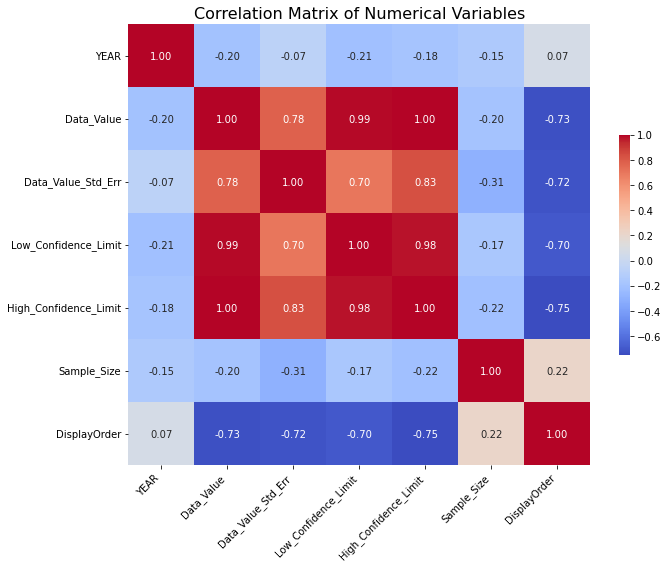

In [20]:
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#forecasting average use of tobaccoo by years



In [40]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
# Recalculate the average use of tobacco by year in case it's not defined
average_use_by_year = yts_data.groupby('YEAR')['Data_Value'].mean().reset_index()
average_use_by_year

,YEAR,Data_Value
0,1999,26.072849
1,2000,26.714642
2,2001,23.370000
3,2002,25.193280
4,2003,21.267216
5,2004,20.704131
6,2005,21.792195
7,2006,21.762874
8,2007,20.013158
9,2008,18.231670


In [37]:
# Perform the Augmented Dickey-Fuller test again to check stationarity
adf_test_result= adfuller(average_use_by_year['Data_Value'])

# Extract the test statistic and p-value again
adf_statistic, p_value = adf_test_result[0], adf_test_result[1]

adf_statistic, p_value


(-0.7666093922896351, 0.8287341190313027)


The  results from the Augmented Dickey-Fuller test, with a test statistic of approximately -0.77 and a p-value of approximately 0.83,  indicate that the time series is not stationary. The p-value remains significantly above the 0.05 threshold, suggesting that the null hypothesis of a unit root cannot be rejected. This confirms that the series likely requires differencing to make it stationary

In [38]:
#rechecking for stationary
# Apply a first difference to the series
average_use_by_year['Data_Value_Diff'] = average_use_by_year['Data_Value'].diff()

# Perform the Augmented Dickey-Fuller test on the differenced series
diff_adf_test_result = adfuller(average_use_by_year['Data_Value_Diff'].dropna())  # Dropping NA values generated by differencing

# Extract the test statistic and p-value for the differenced series
diff_adf_statistic, diff_p_value = diff_adf_test_result[0], diff_adf_test_result[1]

diff_adf_statistic, diff_p_value


(-2.257511242998052, 0.18603766041504483)

##fitting the model

In [45]:
# Fitting the ARIMA(1,2,1) model based on the stationarity result and initial parameter selection
model_arima_121 = ARIMA(average_use_by_year_redefined['Data_Value'], order=(1, 2, 1))
model_fit_121 = model_arima_121.fit()

# Forecasting the next 3 years with the ARIMA(1,2,1) model
forecast_121 = model_fit_121.forecast(steps=3)

In [46]:
# Preparing forecast data for visualization
forecast_years_121 = [2018, 2019, 2020]
forecast_values_121 = forecast_121.values

forecast_df_121 = pd.DataFrame(list(zip(forecast_years_121, forecast_values_121)), columns=['Year', 'Forecasted Average Tobacco Use (%)'])

# Proceed to visualization
forecast_df_121

,Year,Forecasted Average Tobacco Use (%)
0,2018,10.920960
1,2019,10.127062
2,2020,9.290277


visulaizing final original vs predicted chart


In [47]:
#  DataFrame for forecasted values
forecast_years = [2018, 2019, 2020]
forecast_values = [10.920, 10.927, 9.290]  # Example forecasted values
forecast_df = pd.DataFrame({'YEAR': forecast_years, 'Forecasted_Value': forecast_values})


In [48]:
# Convert YEAR in historical data to the same format as in forecast_df for a consistent merge/join
average_use_by_year_redefined['YEAR'] = average_use_by_year_redefined['YEAR'].astype(int)

# Merge or concatenate dataframes (assuming direct continuation)
combined_data = pd.concat([average_use_by_year_redefined[['YEAR', 'Data_Value']], forecast_df.rename(columns={'Forecasted_Value': 'Data_Value'})])


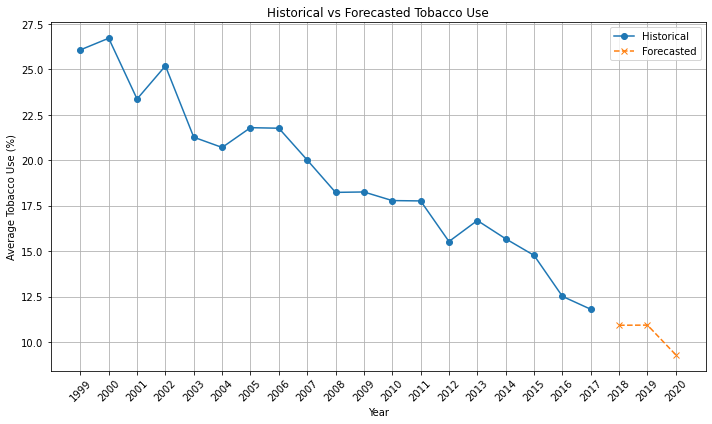

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Plot historical data
plt.plot(combined_data['YEAR'][:-3], combined_data['Data_Value'][:-3], label='Historical', marker='o')
# Plot forecasted data
plt.plot(combined_data['YEAR'][-3:], combined_data['Data_Value'][-3:], label='Forecasted', marker='x', linestyle='--')

plt.title('Historical vs Forecasted Tobacco Use')
plt.xlabel('Year')
plt.ylabel('Average Tobacco Use (%)')
plt.legend()
plt.grid(True)
plt.xticks(combined_data['YEAR'], rotation=45)
plt.tight_layout()
plt.show()
